In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("fivethirtyeight")
from time import time

In [2]:
mushroomdata=pd.read_csv("mushrooms.csv")
mushroomdata.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
cols=mushroomdata.columns

In [5]:
encoding=LabelEncoder()

In [6]:
for i in cols:
    mushroomdata[i]=encoding.fit_transform(mushroomdata[i])

In [7]:
mushroomdata.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [8]:
mushroomdata.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [9]:
mushroomdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
class,8124.0,0.482029,0.499708,0.0,0.0,0.0,1.0,1.0
cap-shape,8124.0,3.348104,1.604329,0.0,2.0,3.0,5.0,5.0
cap-surface,8124.0,1.827671,1.229873,0.0,0.0,2.0,3.0,3.0
cap-color,8124.0,4.504677,2.545821,0.0,3.0,4.0,8.0,9.0
bruises,8124.0,0.415559,0.492848,0.0,0.0,0.0,1.0,1.0
odor,8124.0,4.144756,2.103729,0.0,2.0,5.0,5.0,8.0
gill-attachment,8124.0,0.974151,0.158695,0.0,1.0,1.0,1.0,1.0
gill-spacing,8124.0,0.161497,0.368011,0.0,0.0,0.0,0.0,1.0
gill-size,8124.0,0.309207,0.462195,0.0,0.0,0.0,1.0,1.0
gill-color,8124.0,4.810684,3.540359,0.0,2.0,5.0,7.0,11.0


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [11]:
x=mushroomdata.drop("class",axis=1).values
y=mushroomdata["class"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12)

In [12]:
def modelcreating(optimizer="adam",loss="binary_crossentropy"):
    model=Sequential()
    model.add(Dense(22,input_dim=22,activation="relu"))
    model.add(Dense(22,activation="relu"))
    model.add(Dense(11,activation="relu"))
    model.add(Dense(5,activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss=loss,optimizer=optimizer,metrics=["accuracy"])
    return model
model=modelcreating()

In [13]:
earlystopping=EarlyStopping(monitor="val_loss",mode="min",patience=25)

In [14]:
tensorboard=TensorBoard(log_dir="logs\{}".format(time()),
                        histogram_freq=1,
                       write_graph=True,)

model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
         epochs=100,batch_size=30,verbose=1,
         callbacks=[tensorboard])

Train on 6093 samples, validate on 2031 samples
Epoch 1/100
6093/6093 [==============================] - 1s 128us/sample - loss: 0.5010 - accuracy: 0.7448 - val_loss: 0.2831 - val_accuracy: 0.9045
Epoch 2/100
6093/6093 [==============================] - 0s 82us/sample - loss: 0.1808 - accuracy: 0.9366 - val_loss: 0.0965 - val_accuracy: 0.9700
Epoch 3/100
6093/6093 [==============================] - 0s 71us/sample - loss: 0.0783 - accuracy: 0.9760 - val_loss: 0.0482 - val_accuracy: 0.9882
Epoch 4/100
6093/6093 [==============================] - 0s 73us/sample - loss: 0.0450 - accuracy: 0.9864 - val_loss: 0.0322 - val_accuracy: 0.9902
Epoch 5/100
6093/6093 [==============================] - 0s 73us/sample - loss: 0.0282 - accuracy: 0.9921 - val_loss: 0.0296 - val_accuracy: 0.9921
Epoch 6/100
6093/6093 [==============================] - 0s 67us/sample - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.0113 - val_accuracy: 0.9980
Epoch 7/100
6093/6093 [==============================] - 0s 65u

Epoch 54/100
6093/6093 [==============================] - 0s 61us/sample - loss: 1.1542e-05 - accuracy: 1.0000 - val_loss: 1.8245e-05 - val_accuracy: 1.0000
Epoch 55/100
6093/6093 [==============================] - 0s 65us/sample - loss: 9.5698e-06 - accuracy: 1.0000 - val_loss: 1.0486e-05 - val_accuracy: 1.0000
Epoch 56/100
6093/6093 [==============================] - ETA: 0s - loss: 9.5394e-06 - accuracy: 1.00 - 0s 63us/sample - loss: 9.0211e-06 - accuracy: 1.0000 - val_loss: 1.2673e-05 - val_accuracy: 1.0000
Epoch 57/100
6093/6093 [==============================] - 0s 63us/sample - loss: 8.2571e-06 - accuracy: 1.0000 - val_loss: 8.3634e-06 - val_accuracy: 1.0000
Epoch 58/100
6093/6093 [==============================] - 0s 60us/sample - loss: 6.5212e-06 - accuracy: 1.0000 - val_loss: 8.5125e-06 - val_accuracy: 1.0000
Epoch 59/100
6093/6093 [==============================] - 0s 58us/sample - loss: 6.7379e-06 - accuracy: 1.0000 - val_loss: 7.6035e-06 - val_accuracy: 1.0000
Epoch 60/100

In [15]:
loss=pd.DataFrame(model.history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.501013,0.744789,0.283096,0.904481
1,0.180850,0.936649,0.096492,0.969966
2,0.078330,0.976038,0.048185,0.988183
3,0.044954,0.986378,0.032247,0.990153
4,0.028244,0.992122,0.029554,0.992122


<Figure size 720x432 with 0 Axes>

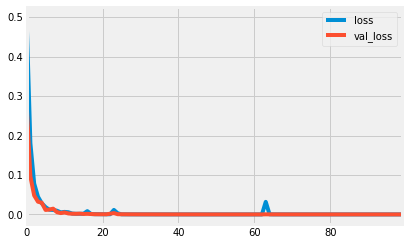

In [16]:
plt.figure(figsize=(10,6))
loss[["loss","val_loss"]].plot()

<Figure size 720x432 with 0 Axes>

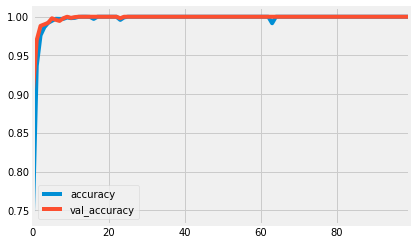

In [17]:
plt.figure(figsize=(10,6))
loss[["accuracy","val_accuracy"]].plot()

In [18]:
y_pred=model.predict_classes(x_test)

In [19]:
# analysing the results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1023    0]
 [   0 1008]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1023
           1       1.00      1.00      1.00      1008

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [20]:
scores=model.evaluate(x_test,y_test)
print(model.metrics_names[1],scores[1]*100)

2031/2031 [==============================] - 0s 19us/sample - loss: 9.3855e-06 - accuracy: 1.0000
accuracy 100.0


In [21]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 2340), started 0:39:27 ago. (Use '!kill 2340' to kill it.)